# clonal state fration

In [45]:
library(ggplot2)
library(gtable)
library(grid)

In [ ]:
library(dplyr)

metadata <- read.csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sc.metadata.BLEELE.csv',sep=',',header=T,row.names = 1)
metadata$tumor_state <- as.character(metadata$tumor_state)
metadata <- metadata[metadata$lineageGrp !='None',]
metadata$lineageGrp <- factor(metadata$lineageGrp,levels = names(sort(table(metadata$lineageGrp),decreasing = T)))
metadata

In [46]:
color_df <- read.csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.new.csv',header=T,sep=',',row.names=1,check.names = F)
color_df

,color
,<chr>
C1,#fa9fb5
C5,#EE00EE
C2,#8B3A3A
C3,#8B8B83
C6,#FFF8DC
C4,#9AFF9A
C11,#AB82FF
C12,#EE5C42
C7,#9400D3


NULL


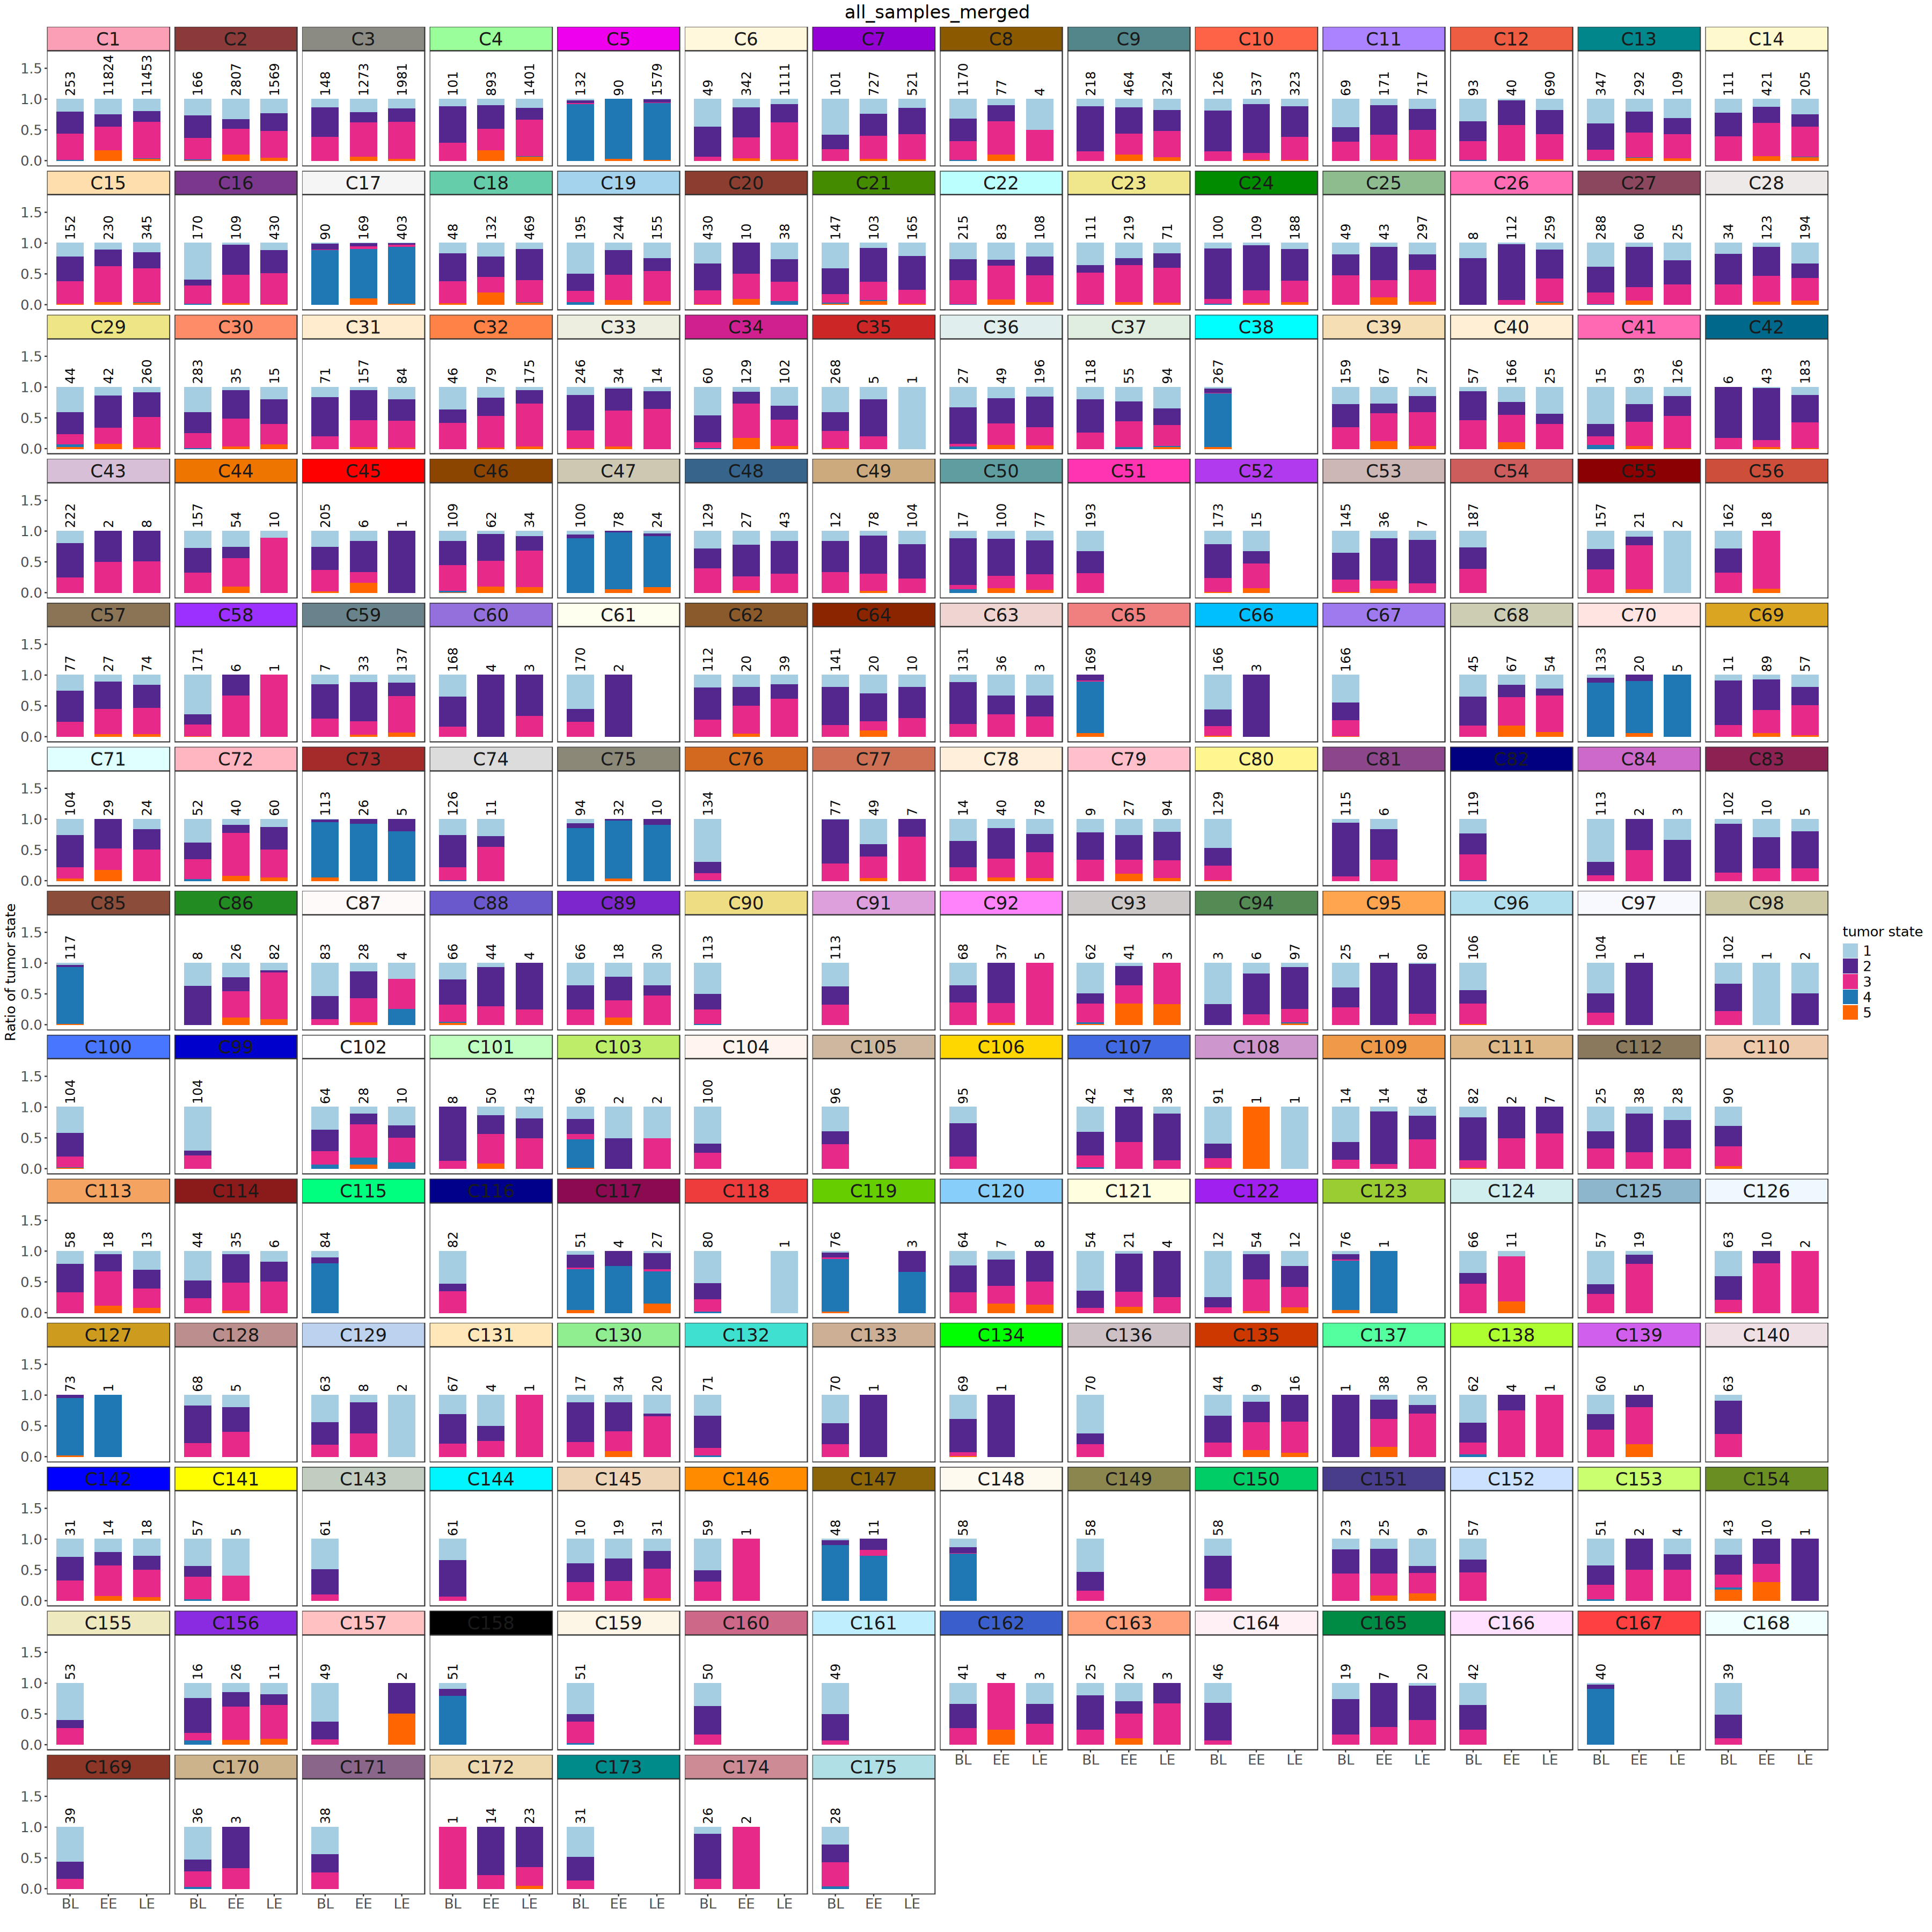

In [47]:
options(repr.plot.width = 30, repr.plot.height = 30)
metadata$Num <- 1

df_sum <- metadata %>%
  group_by(lineageGrp, time) %>%
  summarize(total = sum(Num), .groups = 'drop')


plot <- ggplot() + 
    geom_bar(data=metadata,aes(time,Num,fill=tumor_state),stat="identity",position="fill",width=0.7)+ 
    geom_text(data = df_sum, aes(x = time, y = 1.05, label = total), hjust=0,vjust = 0.5,size=5,angle = 90) +
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')) +
    facet_wrap(~lineageGrp)+
    #scale_y_reverse() +
    xlab('') + ylab('Ratio of tumor state')+ labs(fill='tumor state')+ylim(0,1.7)+
    theme_bw() +ggtitle('all_samples_merged')+theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),
                  legend.text=element_text(size=15),legend.title=element_text(size=15),
                      strip.text = element_text(size = 20),strip.background = element_rect(fill='white'),
                     plot.title = element_text(size=20,hjust=0.5,face='bold'))
g <- ggplot_gtable(ggplot_build(plot))

strips <- which(grepl('strip-', g$layout$name))
strips_mod <- c()
for (i in 1:13){
    start = (13-i)*14+1
    end = (13-i+1)*14
    strips_mod <- c(strips_mod,strips[start:end])
}
color <- color_df[as.character(unique(df_sum$lineageGrp)),'color']

for (i in seq_along(strips_mod)) {
  k <- which(grepl('rect', g$grobs[[strips_mod[i]]]$grobs[[1]]$children))
 if (length(k) < 1){
     #print (strips_mod[i])
      next
  }
  g$grobs[[strips_mod[i]]]$grobs[[1]]$children[[k]]$gp$fill <- color[i]
}
print(plot(g))

# BL clone cluster ratio

In [11]:
library(dplyr)
library(tidyr)

metadata <- read.csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sc.metadata.BLEELE.csv',sep=',',header=T,row.names = 1)
metadata$tumor_state <- as.character(metadata$tumor_state)
metadata <- metadata[metadata$lineageGrp !='None',]
metadata$lineageGrp <- factor(metadata$lineageGrp,levels = names(sort(table(metadata$lineageGrp),decreasing = T)))
metadata

Warning message:
“package ‘tidyr’ was built under R version 4.3.3”


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,tumor_state,color
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107,1,#4169E1
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34,1,#D02090
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20,1,#8B3E2F
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44,2,#EE7600
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97,2,#F8F8FF
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62,1,#8B5A2B
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100,1,#4876FF
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44,3,#EE7600
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13,3,#00868B


In [12]:
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,tumor_state,color
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107,1,#4169E1
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34,1,#D02090
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20,1,#8B3E2F
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44,2,#EE7600
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97,2,#F8F8FF
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62,1,#8B5A2B
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100,1,#4876FF
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44,3,#EE7600
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13,3,#00868B


In [13]:
metadata <- metadata[metadata$time =='BL',]
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,tumor_state,color
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107,1,#4169E1
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34,1,#D02090
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20,1,#8B3E2F
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44,2,#EE7600
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97,2,#F8F8FF
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62,1,#8B5A2B
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100,1,#4876FF
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44,3,#EE7600
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13,3,#00868B


In [14]:
metadata$Num <- 1
metadata.lineageGrp.time.count <- metadata %>%
  group_by(lineageGrp, time) %>%
  summarize(total = sum(Num), .groups = 'drop') %>% as.data.frame
metadata.lineageGrp.time.count <- metadata.lineageGrp.time.count[metadata.lineageGrp.time.count$total > 20,]
metadata.lineageGrp.time.count

,lineageGrp,time,total
,<fct>,<chr>,<dbl>
1,C1,BL,253
2,C2,BL,166
3,C3,BL,148
4,C4,BL,101
5,C5,BL,132
6,C6,BL,49
7,C7,BL,101
8,C8,BL,1170
9,C9,BL,218


In [15]:
lineageGrps_selected <- names(table(metadata.lineageGrp.time.count$lineageGrp)[table(metadata.lineageGrp.time.count$lineageGrp)==1])

In [16]:
metadata <- metadata[metadata$lineageGrp %in% lineageGrps_selected,]
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,tumor_state,color,Num
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<dbl>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107,1,#4169E1,1
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34,1,#D02090,1
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20,1,#8B3E2F,1
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44,2,#EE7600,1
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97,2,#F8F8FF,1
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62,1,#8B5A2B,1
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100,1,#4876FF,1
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44,3,#EE7600,1
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13,3,#00868B,1


In [17]:
metadata.time.cluster.count <- metadata %>%
  group_by(time,lineageGrp, tumor_state) %>%
  summarize(total = sum(Num), .groups = 'drop') %>% as.data.frame
metadata.time.cluster.count

time,lineageGrp,tumor_state,total
<chr>,<fct>,<chr>,<dbl>
BL,C1,1,53
BL,C1,2,91
BL,C1,3,108
BL,C1,4,1
BL,C2,1,44
BL,C2,2,61
BL,C2,3,59
BL,C2,4,1
BL,C2,5,1


In [18]:
metadata.time.cluster.count$time_cluster <- paste0(metadata.time.cluster.count$time,'-cluster',metadata.time.cluster.count$tumor_state)
metadata.time.cluster.count

time,lineageGrp,tumor_state,total,time_cluster
<chr>,<fct>,<chr>,<dbl>,<chr>
BL,C1,1,53,BL-cluster1
BL,C1,2,91,BL-cluster2
BL,C1,3,108,BL-cluster3
BL,C1,4,1,BL-cluster4
BL,C2,1,44,BL-cluster1
BL,C2,2,61,BL-cluster2
BL,C2,3,59,BL-cluster3
BL,C2,4,1,BL-cluster4
BL,C2,5,1,BL-cluster5


In [19]:
lineageGrp.cluster <- as.data.frame(pivot_wider(data = metadata.time.cluster.count,names_from = time_cluster,values_from = total,id_cols = lineageGrp,values_fill = 0))
rownames(lineageGrp.cluster) <- lineageGrp.cluster$lineageGrp
lineageGrp.cluster <- lineageGrp.cluster[,-1]
lineageGrp.cluster

,BL-cluster1,BL-cluster2,BL-cluster3,BL-cluster4,BL-cluster5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,53,91,108,1,0
C2,44,61,59,1,1
C3,21,71,56,0,0
C4,12,60,29,0,0
C5,3,6,2,121,0
C6,22,24,3,0,0
C7,59,24,18,0,0
C8,374,426,366,4,0
C9,26,160,32,0,0


In [20]:
lineageGrp.cluster.ratio <- as.data.frame(t(as.data.frame(apply(lineageGrp.cluster,1,function(x){
   time_cluster_ratio <- x/sum(x)
   return(time_cluster_ratio) 
}))))

In [21]:
lineageGrp.cluster.ratio <- lineageGrp.cluster.ratio[,
        c('BL-cluster1','BL-cluster2','BL-cluster3','BL-cluster4','BL-cluster5')]

In [23]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




Warning message:
“The input is a data frame-like object, convert it to a matrix.”


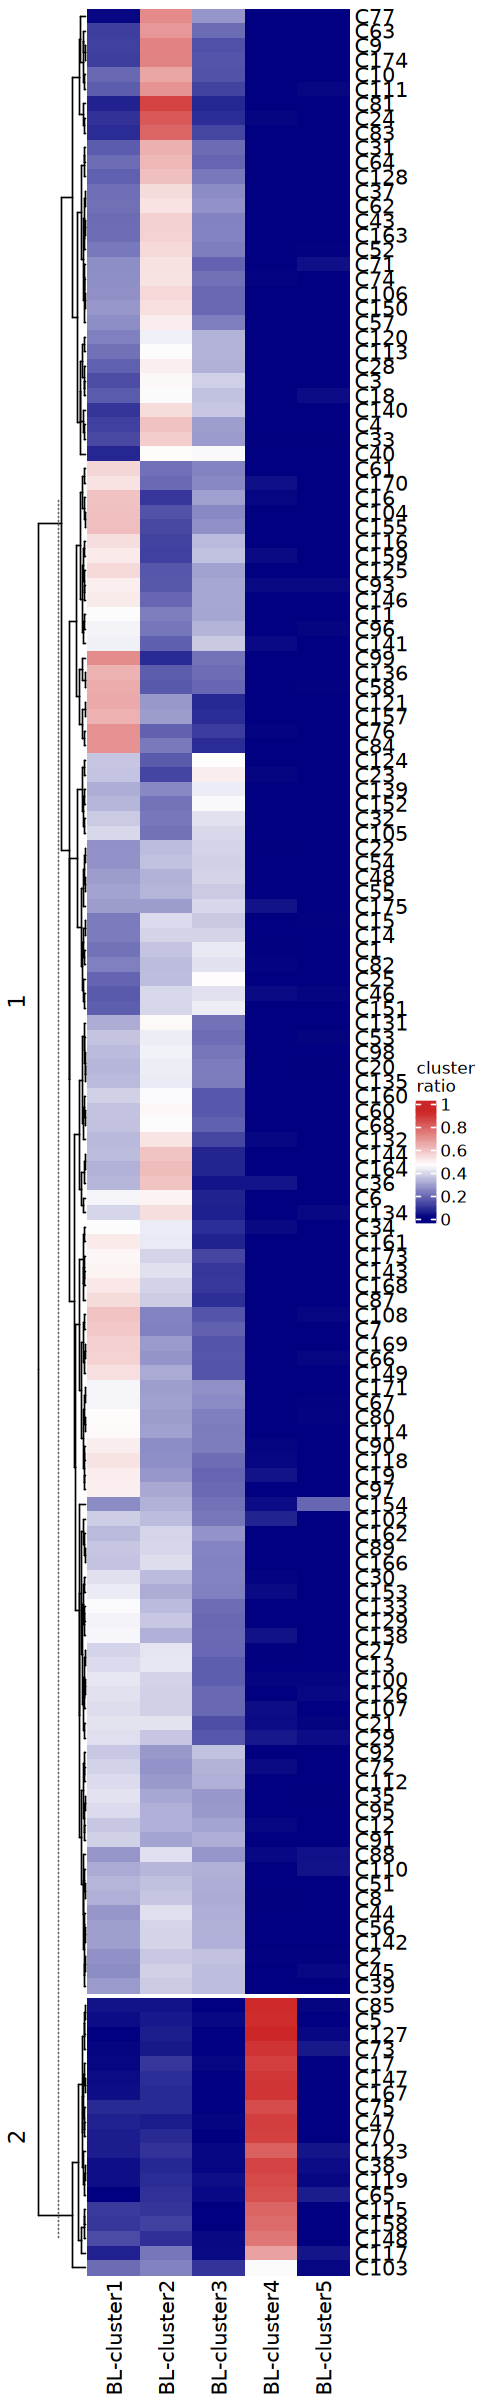

In [27]:
options(repr.plot.width = 4, repr.plot.height = 20)
plot <- Heatmap(lineageGrp.cluster.ratio,cluster_columns = F,row_km = 2,
        colorRampPalette(c("navy", "white", "firebrick3"))(100),heatmap_legend_param = list(title = "cluster\nratio"))
print(plot)

# EELE clone cluster ratio

In [28]:
library(dplyr)
library(tidyr)

metadata <- read.csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sc.metadata.BLEELE.csv',sep=',',header=T,row.names = 1)
metadata$tumor_state <- as.character(metadata$tumor_state)
metadata <- metadata[metadata$lineageGrp !='None',]
metadata$lineageGrp <- factor(metadata$lineageGrp,levels = names(sort(table(metadata$lineageGrp),decreasing = T)))
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,tumor_state,color
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107,1,#4169E1
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34,1,#D02090
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20,1,#8B3E2F
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44,2,#EE7600
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97,2,#F8F8FF
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62,1,#8B5A2B
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100,1,#4876FF
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44,3,#EE7600
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13,3,#00868B


In [29]:
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,tumor_state,color
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107,1,#4169E1
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34,1,#D02090
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20,1,#8B3E2F
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44,2,#EE7600
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97,2,#F8F8FF
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62,1,#8B5A2B
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100,1,#4876FF
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44,3,#EE7600
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13,3,#00868B


In [30]:
metadata$Num <- 1
metadata.lineageGrp.time.count <- metadata %>%
  group_by(lineageGrp, time) %>%
  summarize(total = sum(Num), .groups = 'drop') %>% as.data.frame
metadata.lineageGrp.time.count <- metadata.lineageGrp.time.count[metadata.lineageGrp.time.count$total > 20,]
metadata.lineageGrp.time.count

,lineageGrp,time,total
,<fct>,<chr>,<dbl>
1,C1,BL,253
2,C1,EE,11824
3,C1,LE,11453
4,C2,BL,166
5,C2,EE,2807
6,C2,LE,1569
7,C3,BL,148
8,C3,EE,1273
9,C3,LE,1981


In [31]:
lineageGrps_selected <- names(table(metadata.lineageGrp.time.count$lineageGrp)[table(metadata.lineageGrp.time.count$lineageGrp)==3])

In [32]:
lineageGrps_selected

[1] "C1"   "C2"   "C3"   "C4"   "C5"   "C6"   "C7"   "C9"   "C10"  "C11" 
[11] "C12"  "C13"  "C14"  "C15"  "C16"  "C17"  "C18"  "C19"  "C21"  "C22" 
[21] "C23"  "C24"  "C25"  "C27"  "C28"  "C29"  "C31"  "C32"  "C34"  "C36" 
[31] "C37"  "C39"  "C40"  "C46"  "C47"  "C48"  "C57"  "C68"  "C71"  "C72" 
[41] "C112"

In [33]:
metadata <- metadata[metadata$lineageGrp %in% lineageGrps_selected,]
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,tumor_state,color,Num
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<dbl>
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,0,2,1,-3.2611917,-3.77583440,T1_a3026_AAACCCATCGCTTACC,C34,1,#D02090,1
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,3,0,3,3.0089254,-2.85541376,T1_a3026_AAACGCTCATGGCTGC,C13,3,#00868B,1
T1_T1_a3026_AAACGCTGTGAAGCTG-1,T1_a3026,14962,3268,2.4328298,0,2,0.27368952,Singlet,NA,NA,⋯,0,2,1,-2.9218026,-0.44206791,T1_a3026_AAACGCTGTGAAGCTG,C13,1,#00868B,1
T1_T1_a3026_AAAGAACGTCAGCTTA-1,T1_a3026,19643,4175,3.0188871,0,2,0.44808468,Singlet,NA,NA,⋯,0,2,1,-3.3989006,-3.38431009,T1_a3026_AAAGAACGTCAGCTTA,C3,1,#8B8B83,1
T1_T1_a3026_AAAGAACGTGAACGGT-1,T1_a3026,25277,4856,5.3882977,1,1,0.40020161,Singlet,NA,NA,⋯,1,1,2,3.4936380,5.60685579,T1_a3026_AAAGAACGTGAACGGT,C19,2,#A4D3EE,1
T1_T1_a3026_AAAGAACGTTTCCATT-1,T1_a3026,13737,3517,1.3103298,0,2,0.24697581,Singlet,NA,NA,⋯,0,2,1,-5.1831997,-2.04651221,T1_a3026_AAAGAACGTTTCCATT,C34,1,#D02090,1
T1_T1_a3026_AAAGAACTCCGCATAA-1,T1_a3026,20953,4775,0.3961247,1,1,0.40020161,Singlet,NA,NA,⋯,5,1,2,0.1202686,4.96098177,T1_a3026_AAAGAACTCCGCATAA,C13,2,#00868B,1
T1_T1_a3026_AAAGGGCAGTGCAGCA-1,T1_a3026,19913,3663,0.5624466,2,3,0.25655242,Singlet,NA,NA,⋯,7,3,4,-4.9107826,1.49895875,T1_a3026_AAAGGGCAGTGCAGCA,C47,4,#CDC8B1,1
T1_T1_a3026_AAAGGGCCAAGCACCC-1,T1_a3026,34156,5240,1.9352383,0,2,0.29687500,Singlet,NA,NA,⋯,0,2,1,-4.2399634,-3.45759304,T1_a3026_AAAGGGCCAAGCACCC,C57,1,#8B7355,1


In [34]:
metadata.time.cluster.count <- metadata %>%
  group_by(time,lineageGrp, tumor_state) %>%
  summarize(total = sum(Num), .groups = 'drop') %>% as.data.frame
metadata.time.cluster.count

time,lineageGrp,tumor_state,total
<chr>,<fct>,<chr>,<dbl>
BL,C1,1,53
BL,C1,2,91
BL,C1,3,108
BL,C1,4,1
BL,C2,1,44
BL,C2,2,61
BL,C2,3,59
BL,C2,4,1
BL,C2,5,1


In [35]:
metadata.time.cluster.count$time_cluster <- paste0(metadata.time.cluster.count$time,'-cluster',metadata.time.cluster.count$tumor_state)
metadata.time.cluster.count

time,lineageGrp,tumor_state,total,time_cluster
<chr>,<fct>,<chr>,<dbl>,<chr>
BL,C1,1,53,BL-cluster1
BL,C1,2,91,BL-cluster2
BL,C1,3,108,BL-cluster3
BL,C1,4,1,BL-cluster4
BL,C2,1,44,BL-cluster1
BL,C2,2,61,BL-cluster2
BL,C2,3,59,BL-cluster3
BL,C2,4,1,BL-cluster4
BL,C2,5,1,BL-cluster5


In [36]:
library(tidyr)

In [37]:
lineageGrp.cluster <- as.data.frame(pivot_wider(data = metadata.time.cluster.count,names_from = time_cluster,values_from = total,id_cols = lineageGrp,values_fill = 0))
rownames(lineageGrp.cluster) <- lineageGrp.cluster$lineageGrp
lineageGrp.cluster <- lineageGrp.cluster[,-1]
lineageGrp.cluster

,BL-cluster1,BL-cluster2,BL-cluster3,BL-cluster4,BL-cluster5,EE-cluster1,EE-cluster2,EE-cluster3,EE-cluster4,EE-cluster5,LE-cluster1,LE-cluster2,LE-cluster3,LE-cluster4,LE-cluster5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,53,91,108,1,0,2978,2395,4526,7,1918,2248,2065,6791,15,334
C2,44,61,59,1,1,916,454,1169,2,266,368,457,679,3,62
C3,21,71,56,0,0,273,216,707,0,77,307,432,1185,10,47
C4,12,60,29,0,0,91,341,312,5,144,208,269,824,12,88
C5,3,6,2,121,0,0,0,0,88,2,6,91,6,1460,16
C6,22,24,3,0,0,47,166,117,0,12,97,332,663,0,19
C7,59,24,18,0,0,174,261,271,0,21,78,220,213,0,10
C9,26,160,32,0,0,64,197,159,2,42,58,112,137,0,17
C10,24,83,19,0,0,44,426,63,0,4,40,160,120,1,2


In [38]:
lineageGrp.cluster.ratio <- as.data.frame(t(as.data.frame(apply(lineageGrp.cluster[,c(6:15)],1,function(x){
   time_cluster_ratio <- c(x[1:5]/sum(x[1:5]),x[6:10]/sum(x[6:10]))
   return(time_cluster_ratio) 
}))))

In [39]:
lineageGrp.cluster.ratio

,EE-cluster1,EE-cluster2,EE-cluster3,EE-cluster4,EE-cluster5,LE-cluster1,LE-cluster2,LE-cluster3,LE-cluster4,LE-cluster5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,0.25186062,0.20255413,0.38278078,0.0005920162,0.16221245,0.196280451,0.18030210,0.592945080,0.001309701,0.029162665
C2,0.32632704,0.16173851,0.41645885,0.0007125045,0.09476309,0.234544296,0.29126832,0.432759720,0.001912046,0.039515615
C3,0.21445405,0.16967793,0.55538099,0.0000000000,0.06048704,0.154972236,0.21807168,0.598182736,0.005047956,0.023725391
C4,0.10190370,0.38185890,0.34938410,0.0055991041,0.16125420,0.148465382,0.19200571,0.588151320,0.008565310,0.062812277
C5,0.00000000,0.00000000,0.00000000,0.9777777778,0.02222222,0.003799873,0.05763141,0.003799873,0.924635845,0.010132996
C6,0.13742690,0.48538012,0.34210526,0.0000000000,0.03508772,0.087308731,0.29882988,0.596759676,0.000000000,0.017101710
C7,0.23933975,0.35900963,0.37276479,0.0000000000,0.02888583,0.149712092,0.42226488,0.408829175,0.000000000,0.019193858
C9,0.13793103,0.42456897,0.34267241,0.0043103448,0.09051724,0.179012346,0.34567901,0.422839506,0.000000000,0.052469136
C10,0.08193669,0.79329609,0.11731844,0.0000000000,0.00744879,0.123839009,0.49535604,0.371517028,0.003095975,0.006191950


In [40]:
lineageGrp.cluster.ratio <- lineageGrp.cluster.ratio[,
        c('EE-cluster1','LE-cluster1','EE-cluster2','LE-cluster2','EE-cluster3','LE-cluster3','EE-cluster4','LE-cluster4','EE-cluster5','LE-cluster5')]

In [41]:
library(ComplexHeatmap)

In [42]:
library(RColorBrewer)
color_time <- c('#9ecae1','#e6550d')
names(color_time) <- c('EE','LE')
column_ha <- HeatmapAnnotation(df=data.frame(time=c(rep(c('EE','LE'),5))),                              
                               col=list(time=color_time))

In [43]:
dim(lineageGrp.cluster.ratio)

[1] 41 10

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


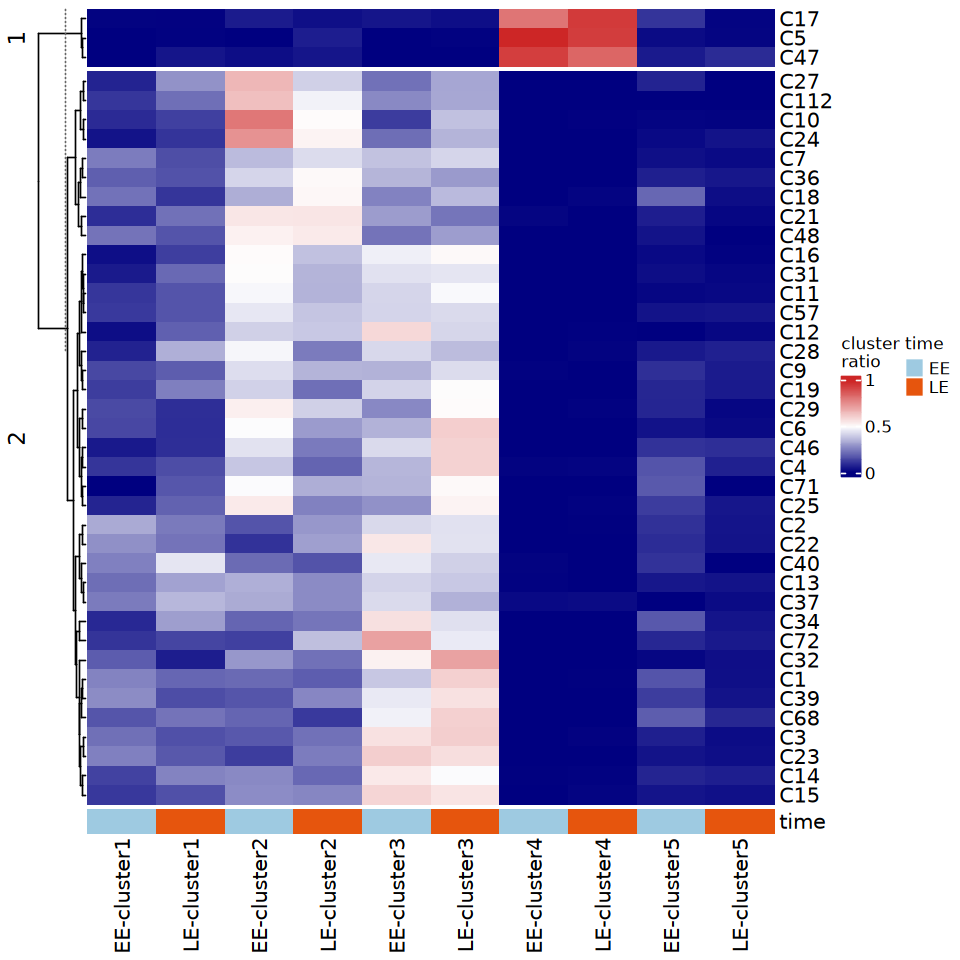

In [44]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot <- Heatmap(lineageGrp.cluster.ratio,cluster_columns = F,bottom_annotation = column_ha,row_km = 2,
        colorRampPalette(c("navy", "white", "firebrick3"))(100),heatmap_legend_param = list(title = "cluster\nratio"))
print(plot)


# high freq vs low freq (size fold change)

In [67]:
library(dplyr)

metadata <- read.csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sc.metadata.BLEELE.csv',sep=',',header=T,row.names = 1)
metadata$tumor_state <- as.character(metadata$tumor_state)
metadata <- metadata[metadata$lineageGrp !='None',]
metadata$lineageGrp <- factor(metadata$lineageGrp,levels = names(sort(table(metadata$lineageGrp),decreasing = T)))
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,tumor_state,color
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107,1,#4169E1
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34,1,#D02090
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20,1,#8B3E2F
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44,2,#EE7600
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97,2,#F8F8FF
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62,1,#8B5A2B
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100,1,#4876FF
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44,3,#EE7600
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13,3,#00868B


In [68]:
metadata$Num <- 1

df_sum <- metadata %>%
  group_by(lineageGrp, time) %>%
  summarize(total = sum(Num), .groups = 'drop')
#df_sum <- df_sum[df_sum$total>30,]
df_sum

lineageGrp,time,total
<fct>,<chr>,<dbl>
C1,BL,253
C1,EE,11824
C1,LE,11453
C2,BL,166
C2,EE,2807
C2,LE,1569
C3,BL,148
C3,EE,1273
C3,LE,1981


In [69]:
df_sum_time <- df_sum %>%
  group_by(time) %>%
  summarize(total = sum(total), .groups = 'drop')
df_sum_time

time,total
<chr>,<dbl>
BL,16881
EE,24559
LE,28186


In [70]:
df_sum <- merge(df_sum,df_sum_time,by='time')
df_sum$freq <- df_sum$total.x/df_sum$total.y
df_sum

time,lineageGrp,total.x,total.y,freq
<chr>,<fct>,<dbl>,<dbl>,<dbl>
BL,C1,253,16881,0.0149872638
BL,C90,113,16881,0.0066939162
BL,C91,113,16881,0.0066939162
BL,C2,166,16881,0.0098335407
BL,C146,59,16881,0.0034950536
BL,C16,170,16881,0.0100704935
BL,C3,148,16881,0.0087672531
BL,C112,25,16881,0.0014809549
BL,C148,58,16881,0.0034358154


In [71]:
df_sum[df_sum$time=='BL',]

,time,lineageGrp,total.x,total.y,freq
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,BL,C1,253,16881,0.0149872638
2,BL,C90,113,16881,0.0066939162
3,BL,C91,113,16881,0.0066939162
4,BL,C2,166,16881,0.0098335407
5,BL,C146,59,16881,0.0034950536
6,BL,C16,170,16881,0.0100704935
7,BL,C3,148,16881,0.0087672531
8,BL,C112,25,16881,0.0014809549
9,BL,C148,58,16881,0.0034358154


In [72]:
library(tidyr)

Warning message:
“package ‘tidyr’ was built under R version 4.3.3”


In [73]:
df <- as.data.frame(pivot_wider(data = df_sum,id_cols = lineageGrp,names_from = time,values_from = freq,values_fill = 0))
df

lineageGrp,BL,EE,LE
<fct>,<dbl>,<dbl>,<dbl>
C1,0.0149872638,4.814528e-01,4.063365e-01
C90,0.0066939162,0.000000e+00,0.000000e+00
C91,0.0066939162,0.000000e+00,0.000000e+00
C2,0.0098335407,1.142962e-01,5.566593e-02
C146,0.0034950536,4.071827e-05,0.000000e+00
C16,0.0100704935,4.438291e-03,1.525580e-02
C3,0.0087672531,5.183436e-02,7.028312e-02
C112,0.0014809549,1.547294e-03,9.934010e-04
C148,0.0034358154,0.000000e+00,0.000000e+00


In [74]:
df$EE <- log2(df$EE/df$BL)
df$LE <- log2(df$LE/df$BL)

In [25]:
library(ggplot2)

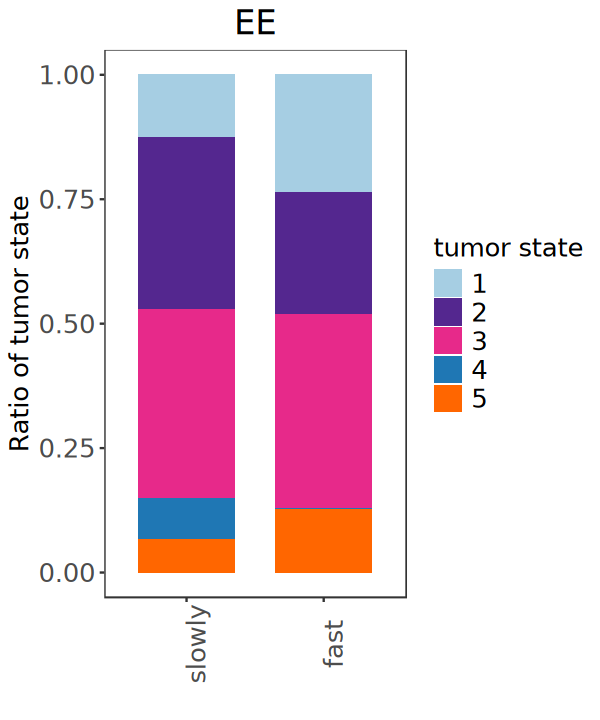

In [76]:
EE_logFC <- df[!is.na(df$EE)&!is.infinite(df$EE),]

EE_fast_growing_clones <- EE_logFC$lineageGrp[EE_logFC$EE > 1 ]
EE_slowly_growing_clones <- EE_logFC$lineageGrp[EE_logFC$EE <= 1 ]

metadata$type <- 'None'
metadata[metadata$lineageGrp %in% c(EE_fast_growing_clones),'type'] <- 'fast'
metadata[metadata$lineageGrp %in% c(EE_slowly_growing_clones),'type'] <- 'slowly'
metadata_select <- metadata[metadata$type!='None' & metadata$time=='EE',]
metadata_select$type <- factor(metadata_select$type,levels = c('slowly','fast'))

options(repr.plot.width = 5, repr.plot.height = 6)
plot <- ggplot() + 
    geom_bar(data=metadata_select,aes(type,Num,fill=tumor_state),stat="identity",position="fill",width=0.7)+ 
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')) +ggtitle('EE')+
    #scale_y_reverse() +
    xlab('') + ylab('Ratio of tumor state')+ labs(fill='tumor state')+
    theme_bw() +theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),axis.text.x = element_text(size=15,angle = 90),
                  legend.text=element_text(size=15),legend.title=element_text(size=15),
                      strip.text = element_text(size = 20),strip.background = element_rect(fill='white'),
                     plot.title = element_text(size=20,hjust=0.5,face='bold'))
print(plot)


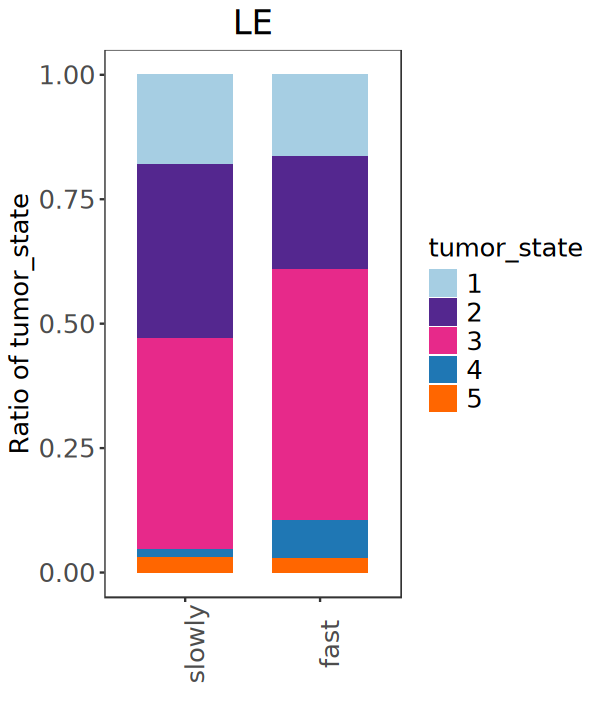

In [78]:
LE_logFC <- df[!is.na(df$LE)&!is.infinite(df$LE),]

LE_fast_growing_clones <- LE_logFC$lineageGrp[LE_logFC$LE > 1 ]
LE_slowly_growing_clones <- LE_logFC$lineageGrp[LE_logFC$LE <= 1 ]

metadata$type <- 'None'
metadata[metadata$lineageGrp %in% c(LE_fast_growing_clones),'type'] <- 'fast'
metadata[metadata$lineageGrp %in% c(LE_slowly_growing_clones),'type'] <- 'slowly'
metadata_select <- metadata[metadata$type!='None' & metadata$time=='LE',]
metadata_select$type <- factor(metadata_select$type,levels = c('slowly','fast'))

options(repr.plot.width = 5, repr.plot.height = 6)
plot <- ggplot() + 
    geom_bar(data=metadata_select,aes(type,Num,fill=tumor_state),stat="identity",position="fill",width=0.7)+ 
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')) +ggtitle('LE')+
    #scale_y_reverse() +
    xlab('') + ylab('Ratio of tumor_state')+ labs(fill='tumor_state')+
    theme_bw() +theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),axis.text.x = element_text(size=15,angle = 90),
                  legend.text=element_text(size=15),legend.title=element_text(size=15),
                      strip.text = element_text(size = 20),strip.background = element_rect(fill='white'),
                     plot.title = element_text(size=20,hjust=0.5,face='bold'))
print(plot)